In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['t10k-images-idx3-ubyte', 'train-images-idx3-ubyte', 'fashion-mnist_train.csv', 'train-labels-idx1-ubyte', 'fashion-mnist_test.csv', 't10k-labels-idx1-ubyte']


In [2]:
train_path = "../input/fashion-mnist_train.csv"
train_df = pd.read_csv(train_path)
print(train_df.shape)

(60000, 785)


In [3]:
target = train_df["label"].values.reshape(train_df.shape[0], 1)
train_df.drop("label", axis=1, inplace=True)
train = train_df.values
print(train.shape)

(60000, 784)


In [4]:
train = train.astype("float32") / 255

In [5]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(target)
target1 = enc.transform(target).toarray()
print(target1[:5])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [6]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train, target1, test_size=0.2, random_state=25)

In [7]:
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

params = {"n_neighbors":[1, 3, 5, 7], "metric":["euclidean", "manhattan", "chebyshev"]}
acc = {}
i=0

for m in params["metric"]:
    acc[m] = []
    for k in params["n_neighbors"]:
        print("Model_{} metric: {}, n_neighbors: {}".format(i, m, k))
        i += 1
        t = time()
        knn = KNeighborsClassifier(n_neighbors=k, metric=m)
        knn.fit(train_x, train_y)
        pred = knn.predict(val_x)
        print("Time: ", time() - t)
        acc[m].append(accuracy_score(val_y, pred))
        print("Acc: ", acc[m][-1])

Model_0 metric: euclidean, n_neighbors: 1
Time:  792.3292174339294
Acc:  0.8491666666666666
Model_1 metric: euclidean, n_neighbors: 3
Time:  816.2158472537994
Acc:  0.8450833333333333
Model_2 metric: euclidean, n_neighbors: 5
Time:  839.3427910804749
Acc:  0.8379166666666666
Model_3 metric: euclidean, n_neighbors: 7
Time:  852.9071629047394
Acc:  0.836
Model_4 metric: manhattan, n_neighbors: 1
Time:  871.3268692493439
Acc:  0.8505833333333334
Model_5 metric: manhattan, n_neighbors: 3
Time:  889.1431596279144
Acc:  0.8493333333333334
Model_6 metric: manhattan, n_neighbors: 5
Time:  891.611380815506
Acc:  0.8465
Model_7 metric: manhattan, n_neighbors: 7
Time:  861.7855062484741
Acc:  0.84275
Model_8 metric: chebyshev, n_neighbors: 1
Time:  354.3624904155731
Acc:  0.6374166666666666
Model_9 metric: chebyshev, n_neighbors: 3
Time:  379.45125555992126
Acc:  0.6089166666666667
Model_10 metric: chebyshev, n_neighbors: 5
Time:  415.39342856407166
Acc:  0.5948333333333333
Model_11 metric: cheby

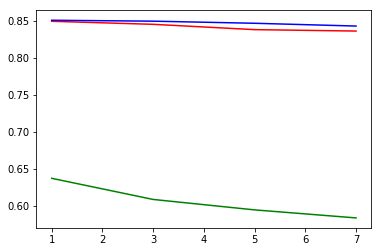

In [8]:
import matplotlib.pyplot as plt

c = ["r", "b", "g"]
for i, m in enumerate(params["metric"]):
    plt.plot(range(1, 9, 2), acc[m], c=c[i])
plt.show()